# Prediction of Dengue Fever

In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np
import seaborn as sb

## Data Import and Pre-Processing

In [45]:
# Import features training dataset
features_training_data = os.path.join("Data", "dengue_features_train.csv")
features_training_df = pd.read_csv(features_training_data)
features_training_df.head()
features_training_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


**There are 1456 training observations.**

In [3]:
# Import features testing dataset
features_testing_data = os.path.join("Data", "dengue_features_test.csv")
features_testing_df = pd.read_csv(features_testing_data)
features_testing_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


**There are 416 test observations.**

In [5]:
# Import training labels dataset, leave only total_cases
labels_training_data = os.path.join("Data", "dengue_labels_train.csv")
labels_training = pd.read_csv(labels_training_data)
labels_training_df = labels_training.drop(columns=['city', 'year', 'weekofyear'])
labels_training_df

,total_cases
0,4
1,5
2,4
3,3
4,6
...,...
1451,5
1452,8
1453,1
1454,1


### Process Training Data

In [17]:
# Check duplicate columns
features_training_df['precipitation_amt_mm'].equals(features_training_df['reanalysis_sat_precip_amt_mm'])

True

In [49]:
# Drop unneccesary and duplicate features 
features_training_processing = features_training_df.drop(columns=['year','weekofyear','week_start_date','precipitation_amt_mm'])
features_training_processing

# One-hot encode city column
features_encoded_df = pd.get_dummies(features_training_processing, columns=['city'])
features_encoded_df

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_iq,city_sj
0,0.122600,0.103725,0.198483,0.177617,297.572857,297.742857,292.414286,299.8,295.9,32.00,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0,1
1,0.169900,0.142175,0.162357,0.155486,298.211429,298.442857,293.951429,300.9,296.4,17.94,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0,1
2,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,295.434286,300.5,297.3,26.10,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,0,1
3,0.128633,0.245067,0.227557,0.235886,298.987143,299.228571,295.310000,301.4,297.0,13.90,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,0,1
4,0.196200,0.262200,0.251200,0.247340,299.518571,299.664286,295.821429,301.9,297.5,12.20,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.342750,0.318900,0.256343,0.292514,299.334286,300.771429,296.825714,309.7,294.5,45.00,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,1,0
1452,0.160157,0.160371,0.136043,0.225657,298.330000,299.392857,296.452857,308.5,291.9,207.10,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,1,0
1453,0.247057,0.146057,0.250357,0.233714,296.598571,297.592857,295.501429,305.5,292.4,50.60,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,0
1454,0.333914,0.245771,0.278886,0.325486,296.345714,297.521429,295.324286,306.1,291.9,62.33,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,0


## Build Baseline Model Using All Features

### Pre-Processing

In [76]:
# Combine features and labels data
combined_df = pd.concat([features_training_processing, labels_training_df], axis=1, join='inner')
combined_df

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,0.122600,0.103725,0.198483,0.177617,297.572857,297.742857,292.414286,299.8,295.9,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,0.169900,0.142175,0.162357,0.155486,298.211429,298.442857,293.951429,300.9,296.4,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,295.434286,300.5,297.3,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,0.128633,0.245067,0.227557,0.235886,298.987143,299.228571,295.310000,301.4,297.0,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,0.196200,0.262200,0.251200,0.247340,299.518571,299.664286,295.821429,301.9,297.5,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,0.342750,0.318900,0.256343,0.292514,299.334286,300.771429,296.825714,309.7,294.5,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,0.160157,0.160371,0.136043,0.225657,298.330000,299.392857,296.452857,308.5,291.9,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,0.247057,0.146057,0.250357,0.233714,296.598571,297.592857,295.501429,305.5,292.4,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,0.333914,0.245771,0.278886,0.325486,296.345714,297.521429,295.324286,306.1,291.9,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [78]:
# Drop null values to perform regression
combined_baseline_df = combined_df.dropna()

# One-hot encode city column
combined_baseline_encoded_df = pd.get_dummies(combined_baseline_df, columns=['city'])
combined_baseline_encoded_df

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj
0,0.122600,0.103725,0.198483,0.177617,297.572857,297.742857,292.414286,299.8,295.9,32.00,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0,1
1,0.169900,0.142175,0.162357,0.155486,298.211429,298.442857,293.951429,300.9,296.4,17.94,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0,1
2,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,295.434286,300.5,297.3,26.10,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0,1
3,0.128633,0.245067,0.227557,0.235886,298.987143,299.228571,295.310000,301.4,297.0,13.90,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0,1
4,0.196200,0.262200,0.251200,0.247340,299.518571,299.664286,295.821429,301.9,297.5,12.20,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.342750,0.318900,0.256343,0.292514,299.334286,300.771429,296.825714,309.7,294.5,45.00,...,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,1,0
1452,0.160157,0.160371,0.136043,0.225657,298.330000,299.392857,296.452857,308.5,291.9,207.10,...,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,1,0
1453,0.247057,0.146057,0.250357,0.233714,296.598571,297.592857,295.501429,305.5,292.4,50.60,...,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,1,0
1454,0.333914,0.245771,0.278886,0.325486,296.345714,297.521429,295.324286,306.1,291.9,62.33,...,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [85]:
# Assign training dataset into X(features) and y(label)
X = combined_baseline_encoded_df.drop('total_cases', axis=1)
y = combined_baseline_encoded_df['total_cases'].values.reshape(-1,1)
print(X.shape, y.shape)

(1199, 21) (1199, 1)


In [86]:
# Split data into training and validation
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
# Fit (train) baseline model using training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
# Evaluate baseline model
yhat = model.predict(X_eval)
# evaluate predictions
mae = mean_absolute_error(y_eval, yhat)
print('Baseline MAE: %.3f' % mae)

Baseline MAE: 16.980


## Data Exploration & Feature Selection

<Axes: >

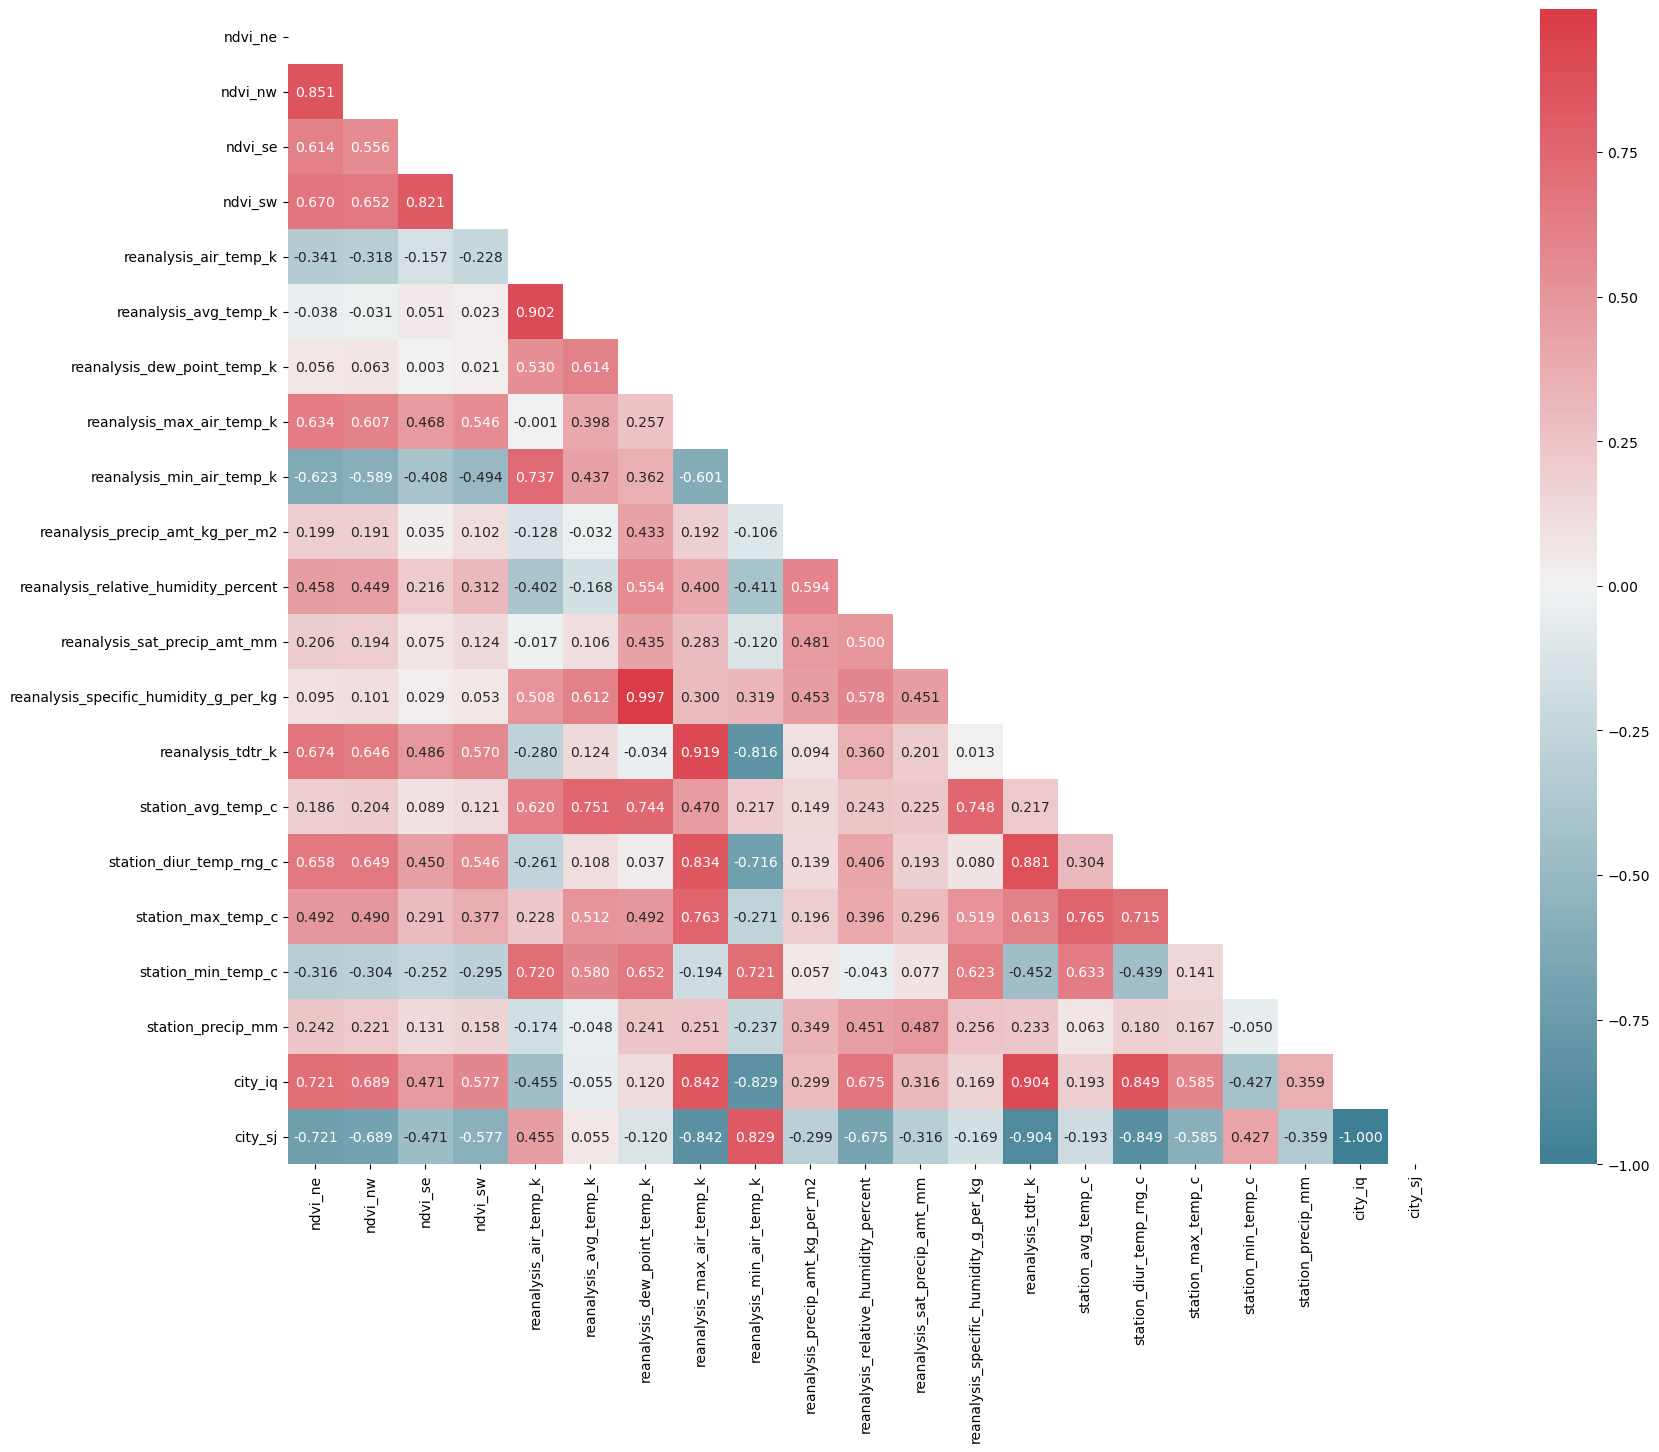

In [42]:
# Examine pearson correlation matrix to see if some variables should be excluded from analysis
corr_matrix = features_encoded.corr(method='pearson') #.unstack().sort_values().drop_duplicates()

# Create heatmap for easier visualization
plt.figure(figsize = (25,15))
lower = np.triu(corr_matrix)
sb.heatmap(corr_matrix,cmap=sb.diverging_palette(220, 10, as_cmap=True), annot=True, square=True, fmt='.3f', mask=lower)

# Customary to keep variables with correlation coefficients smaller than absolute value of 0.8

In [44]:
# Check for null values to determine which features to drop
features_encoded.isnull().sum().sort_values(ascending=False)

ndvi_ne                                  194
ndvi_nw                                   52
station_diur_temp_rng_c                   43
station_avg_temp_c                        43
ndvi_se                                   22
ndvi_sw                                   22
station_precip_mm                         22
station_max_temp_c                        20
station_min_temp_c                        14
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
reanalysis_relative_humidity_percent      10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_min_air_temp_k                 10
reanalysis_max_air_temp_k                 10
reanalysis_dew_point_temp_k               10
reanalysis_avg_temp_k                     10
reanalysis_air_temp_k                     10
city_iq                                    0
city_sj                                    0
dtype: int64

 - Ndvi_ne and ndvi_nw have a large correlation coefficient - **drop ndvi_ne** since it has more null values.  
 - Ndvi_se and ndvs_sw have a large correlation coefficient - **drop ndvi_sw**.  
 - Reanalysis_avg_temp_k and reanalysis_air_temp_k have a large correlation coefficient - **drop reanalysis_air_temp_k**.
 - Reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k have a large correlation coefficient - drop **reanalysis_specific_humidity_g_per_kg** as dew point is more relevant to analysis. 
 - **Drop station_diur_temp_rng_c** and **reanalysis_tdtr_k** as they represent similar values and give similar information to min and max air temperatures.